In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 9

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 9)                 99        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
32/33 [============================>.] - ETA: 0s - loss: 2.2577 - accuracy: 0.1565
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 4s 38ms/step - loss: 2.2566 - accuracy: 0.1573 - val_loss: 2.0729 - val_accuracy: 0.2812
Epoch 2/1000
33/33 [==============================] - ETA: 0s - loss: 2.0571 - accuracy: 0.2633
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 13ms/step - loss: 2.0571 - accuracy: 0.2633 - val_loss: 1.9411 - val_accuracy: 0.3517
Epoch 3/1000
26/33 [======================>.......] - ETA: 0s - loss: 1.9358 - accuracy: 0.3287
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 1s 15ms/step - loss: 1.9226 - accuracy: 0.3338 - val_loss: 1.8091 - val_accuracy: 0.3852
Epoch 4/1000
31/33 [===========================>..] - ETA: 0s - loss: 1.8112 - accuracy: 0.376

24/33 [====================>.........] - ETA: 0s - loss: 1.0700 - accuracy: 0.6077
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 1s 21ms/step - loss: 1.0709 - accuracy: 0.6058 - val_loss: 0.7745 - val_accuracy: 0.7791
Epoch 29/1000
29/33 [=========================>....] - ETA: 0s - loss: 1.0617 - accuracy: 0.6193
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 15ms/step - loss: 1.0633 - accuracy: 0.6175 - val_loss: 0.7591 - val_accuracy: 0.7754
Epoch 30/1000
33/33 [==============================] - ETA: 0s - loss: 1.0398 - accuracy: 0.6211
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 1s 16ms/step - loss: 1.0398 - accuracy: 0.6211 - val_loss: 0.7523 - val_accuracy: 0.7863
Epoch 31/1000
31/33 [===========================>..] - ETA: 0s - loss: 1.0418 - accuracy: 0.6240
Epoch

Epoch 55/1000
33/33 [==============================] - ETA: 0s - loss: 0.9203 - accuracy: 0.6676
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 1s 17ms/step - loss: 0.9203 - accuracy: 0.6676 - val_loss: 0.5736 - val_accuracy: 0.8401
Epoch 56/1000
26/33 [======================>.......] - ETA: 0s - loss: 0.8961 - accuracy: 0.6788
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 11ms/step - loss: 0.8988 - accuracy: 0.6754 - val_loss: 0.5688 - val_accuracy: 0.8336
Epoch 57/1000
30/33 [==========================>...] - ETA: 0s - loss: 0.9204 - accuracy: 0.6695
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 1s 18ms/step - loss: 0.9164 - accuracy: 0.6688 - val_loss: 0.5720 - val_accuracy: 0.8488
Epoch 58/1000
27/33 [=======================>......] - ETA: 0s - loss: 0.9217 - accuracy

Epoch 82/1000
30/33 [==========================>...] - ETA: 0s - loss: 0.8522 - accuracy: 0.6865
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 14ms/step - loss: 0.8558 - accuracy: 0.6839 - val_loss: 0.4945 - val_accuracy: 0.8721
Epoch 83/1000
28/33 [========================>.....] - ETA: 0s - loss: 0.8682 - accuracy: 0.6800
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 11ms/step - loss: 0.8629 - accuracy: 0.6805 - val_loss: 0.5011 - val_accuracy: 0.8808
Epoch 84/1000
30/33 [==========================>...] - ETA: 0s - loss: 0.8324 - accuracy: 0.6862
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 1s 15ms/step - loss: 0.8406 - accuracy: 0.6827 - val_loss: 0.5005 - val_accuracy: 0.8815
Epoch 85/1000
33/33 [==============================] - ETA: 0s - loss: 0.8259 - accuracy

Epoch 109/1000
30/33 [==========================>...] - ETA: 0s - loss: 0.7991 - accuracy: 0.7055
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 1s 19ms/step - loss: 0.7948 - accuracy: 0.7064 - val_loss: 0.4598 - val_accuracy: 0.9026
Epoch 110/1000
32/33 [============================>.] - ETA: 0s - loss: 0.7975 - accuracy: 0.7053
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 1s 16ms/step - loss: 0.7983 - accuracy: 0.7050 - val_loss: 0.4579 - val_accuracy: 0.9004
Epoch 111/1000
31/33 [===========================>..] - ETA: 0s - loss: 0.7976 - accuracy: 0.7084
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 1s 18ms/step - loss: 0.7944 - accuracy: 0.7101 - val_loss: 0.4564 - val_accuracy: 0.8953
Epoch 112/1000
27/33 [=======================>......] - ETA: 0s - loss: 0.7918 - a

Epoch 136/1000
27/33 [=======================>......] - ETA: 0s - loss: 0.7753 - accuracy: 0.7179
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 14ms/step - loss: 0.7702 - accuracy: 0.7161 - val_loss: 0.4270 - val_accuracy: 0.9019
Epoch 137/1000
25/33 [=====================>........] - ETA: 0s - loss: 0.7688 - accuracy: 0.7197
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 13ms/step - loss: 0.7724 - accuracy: 0.7181 - val_loss: 0.4238 - val_accuracy: 0.9041
Epoch 138/1000
25/33 [=====================>........] - ETA: 0s - loss: 0.7584 - accuracy: 0.7231
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 13ms/step - loss: 0.7694 - accuracy: 0.7164 - val_loss: 0.4249 - val_accuracy: 0.9055
Epoch 139/1000
29/33 [=========================>....] - ETA: 0s - loss: 0.7615 - a

Epoch 163/1000
26/33 [======================>.......] - ETA: 0s - loss: 0.7319 - accuracy: 0.7308
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 11ms/step - loss: 0.7335 - accuracy: 0.7302 - val_loss: 0.4110 - val_accuracy: 0.9099
Epoch 164/1000
30/33 [==========================>...] - ETA: 0s - loss: 0.7648 - accuracy: 0.7245
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 1s 17ms/step - loss: 0.7646 - accuracy: 0.7246 - val_loss: 0.4088 - val_accuracy: 0.9070
Epoch 165/1000
27/33 [=======================>......] - ETA: 0s - loss: 0.7242 - accuracy: 0.7332
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 10ms/step - loss: 0.7218 - accuracy: 0.7312 - val_loss: 0.3992 - val_accuracy: 0.9070
Epoch 166/1000
25/33 [=====================>........] - ETA: 0s - loss: 0.7573 - a

Epoch 190/1000
26/33 [======================>.......] - ETA: 0s - loss: 0.7261 - accuracy: 0.7365
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 12ms/step - loss: 0.7364 - accuracy: 0.7309 - val_loss: 0.3824 - val_accuracy: 0.9113
Epoch 191/1000
30/33 [==========================>...] - ETA: 0s - loss: 0.7048 - accuracy: 0.7385
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 1s 19ms/step - loss: 0.7065 - accuracy: 0.7370 - val_loss: 0.3807 - val_accuracy: 0.9084
Epoch 192/1000
28/33 [========================>.....] - ETA: 0s - loss: 0.7139 - accuracy: 0.7405
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 11ms/step - loss: 0.7211 - accuracy: 0.7377 - val_loss: 0.3842 - val_accuracy: 0.9055
Epoch 193/1000
29/33 [=========================>....] - ETA: 0s - loss: 0.7375 - a

Epoch 217/1000
26/33 [======================>.......] - ETA: 0s - loss: 0.7060 - accuracy: 0.7422
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 1s 22ms/step - loss: 0.7143 - accuracy: 0.7408 - val_loss: 0.3698 - val_accuracy: 0.9004
Epoch 218/1000
27/33 [=======================>......] - ETA: 0s - loss: 0.6969 - accuracy: 0.7514
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 1s 19ms/step - loss: 0.7099 - accuracy: 0.7452 - val_loss: 0.3741 - val_accuracy: 0.9055
Epoch 219/1000
28/33 [========================>.....] - ETA: 0s - loss: 0.7060 - accuracy: 0.7372
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 1s 21ms/step - loss: 0.6944 - accuracy: 0.7413 - val_loss: 0.3663 - val_accuracy: 0.9150
Epoch 220/1000
33/33 [==============================] - ETA: 0s - loss: 0.7316 - a

Epoch 244/1000
30/33 [==========================>...] - ETA: 0s - loss: 0.6966 - accuracy: 0.7474
Epoch 244: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 14ms/step - loss: 0.6999 - accuracy: 0.7442 - val_loss: 0.3581 - val_accuracy: 0.9142
Epoch 245/1000
31/33 [===========================>..] - ETA: 0s - loss: 0.6845 - accuracy: 0.7553
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 1s 19ms/step - loss: 0.6897 - accuracy: 0.7532 - val_loss: 0.3536 - val_accuracy: 0.9157
Epoch 246/1000
28/33 [========================>.....] - ETA: 0s - loss: 0.6818 - accuracy: 0.7483
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 11ms/step - loss: 0.6857 - accuracy: 0.7476 - val_loss: 0.3645 - val_accuracy: 0.9157
Epoch 247/1000
33/33 [==============================] - ETA: 0s - loss: 0.7132 - a

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 17ms/step - loss: 0.3505 - accuracy: 0.9135


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 297ms/step
[1.0658928e-01 3.3914782e-02 1.9401734e-06 7.6727784e-01 5.6498051e-02
 1.1265079e-05 3.3065956e-02 9.5038013e-05 2.5458303e-03]
3


# Confusion matrix

43/43 [==============================] - 0s 4ms/step


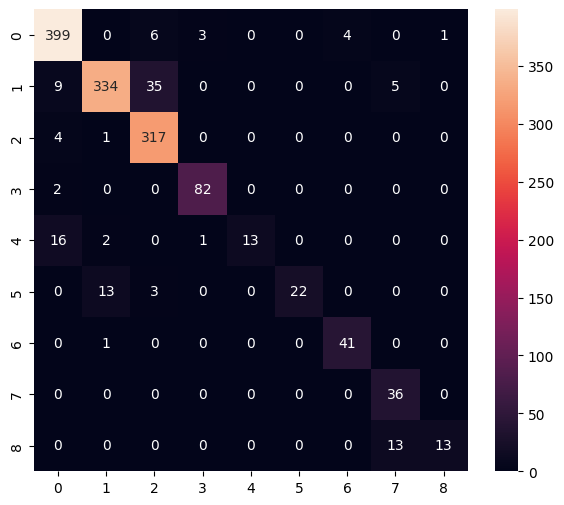

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       413
           1       0.95      0.87      0.91       383
           2       0.88      0.98      0.93       322
           3       0.95      0.98      0.96        84
           4       1.00      0.41      0.58        32
           5       1.00      0.58      0.73        38
           6       0.91      0.98      0.94        42
           7       0.67      1.00      0.80        36
           8       0.93      0.50      0.65        26

    accuracy                           0.91      1376
   macro avg       0.91      0.81      0.83      1376
weighted avg       0.92      0.91      0.91      1376



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

6656

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.0658928e-01 3.3914741e-02 1.9401682e-06 7.6727796e-01 5.6497991e-02
 1.1265070e-05 3.3065911e-02 9.5037925e-05 2.5458306e-03]
3
